# Importing the Required Libraries

In [9]:
import warnings 
warnings.filterwarnings('ignore')

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [13]:
df = pd.read_excel("Summer_omlpics_project.xlsx")

In [14]:
#checking the first few rows of the dataset
df.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [15]:
#summary of the dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   City          770 non-null    object
 1   Year          770 non-null    int64 
 2   Sport         770 non-null    object
 3   Discipline    770 non-null    object
 4   Event         770 non-null    object
 5   Athlete       770 non-null    object
 6   Gender        770 non-null    object
 7   Country_Code  770 non-null    object
 8   Country       770 non-null    object
 9   Event_gender  770 non-null    object
 10  Medal         770 non-null    object
dtypes: int64(1), object(10)
memory usage: 66.3+ KB


,Year
count,770.0
mean,1976.0
std,0.0
min,1976.0
25%,1976.0
50%,1976.0
75%,1976.0
max,1976.0


# Data cleaning

#check for missing values and remove or impute them if necessary.


In [21]:
#check for missing values

df.isnull().sum()

City            0
Year            0
Sport           0
Discipline      0
Event           0
Athlete         0
Gender          0
Country_Code    0
Country         0
Event_gender    0
Medal           0
dtype: int64

In [23]:
#Drop rows with missing values if any

df_cleaned = df.dropna()

In [25]:
# After cleaning, check the dataset again
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   City          770 non-null    object
 1   Year          770 non-null    int64 
 2   Sport         770 non-null    object
 3   Discipline    770 non-null    object
 4   Event         770 non-null    object
 5   Athlete       770 non-null    object
 6   Gender        770 non-null    object
 7   Country_Code  770 non-null    object
 8   Country       770 non-null    object
 9   Event_gender  770 non-null    object
 10  Medal         770 non-null    object
dtypes: int64(1), object(10)
memory usage: 66.3+ KB


# Exploratory Data Analysis (EDA)

In [28]:
# Total medals won by each country 

medals_by_country = df_cleaned.groupby('Country')['Medal'].count().sort_values(ascending = False)

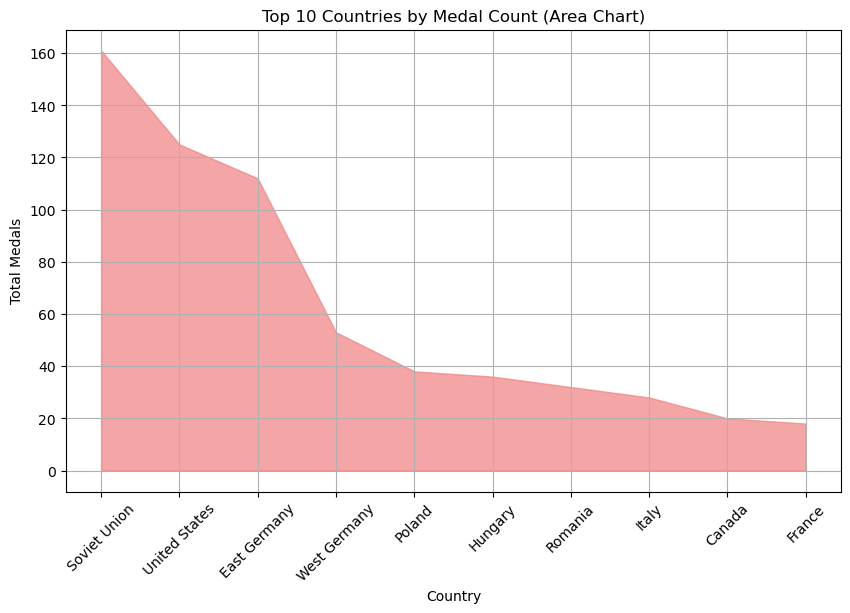

In [38]:
# Plotting the top 10 countries by medals
top10 = medals_by_country.head(10)

x = np.arange(len(top10))

plt.figure(figsize=(10,6))
plt.fill_between(x, top10.values, color='lightcoral', alpha=0.7)
plt.xticks(x, top10.index, rotation=45)
plt.title("Top 10 Countries by Medal Count (Area Chart)")
plt.xlabel("Country")
plt.ylabel("Total Medals")
plt.grid(True)
plt.show()

In [40]:
# Medals won over the year

#grouping by year and counting the medals won 

medals_over_years = df_cleaned.groupby('Year')['Medal'].count()

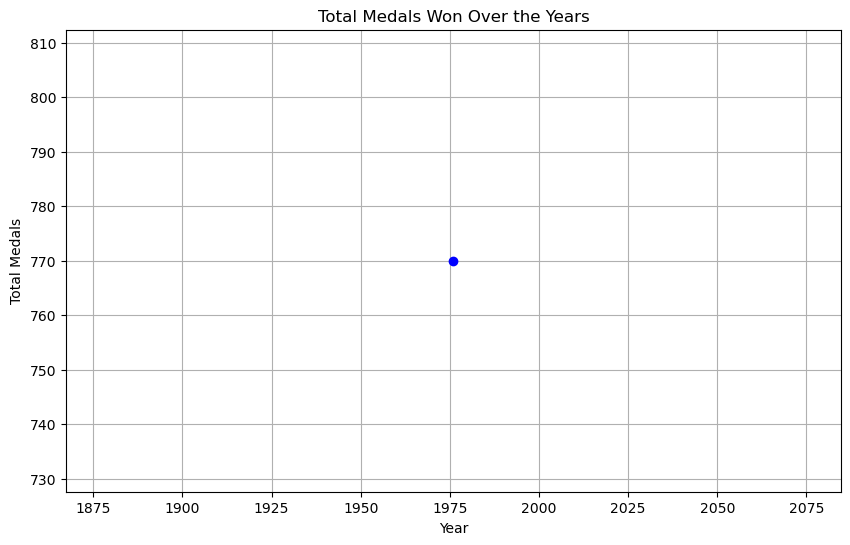

In [50]:
# Plotting the trend medals won over by years 

plt.figure(figsize=(12,6))  # made it a bit wider for years
plt.plot(medals_over_years.index, medals_over_years.values, marker='o', linestyle='-', color='blue', linewidth=2, markersize=6)

plt.title("Total Medals Won Over the Years", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Medals", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if many years
plt.tight_layout()  # Adjust layout so nothing is cut off
plt.show()


In [60]:
# Gender Distribution events

gender_distribution = df_cleaned['Gender'].value_counts()

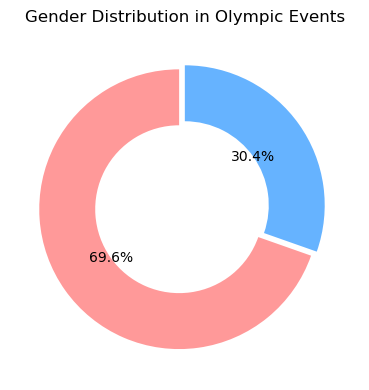

In [64]:
# Plotting gender distribution 

plt.figure(figsize=(6,4))
wedges, texts, autotexts = plt.pie(
    gender_distribution, 
    autopct='%1.1f%%', 
    colors=['#ff9999','#66b3ff'], 
    explode=[0.05, 0],
    startangle=90,   # optional: start from top
    wedgeprops=dict(width=0.4)  # <-- this creates the hole (donut effect)
)

plt.title("Gender Distribution in Olympic Events")
plt.ylabel('')  # remove y-axis label
plt.tight_layout()
plt.show()





In [66]:
# Top Athletes with most Medals

# Groupby by Athlete and count the number of medals 

athlete_medal_count = df_cleaned.groupby('Athlete')['Medal'].count().sort_values(ascending= False)

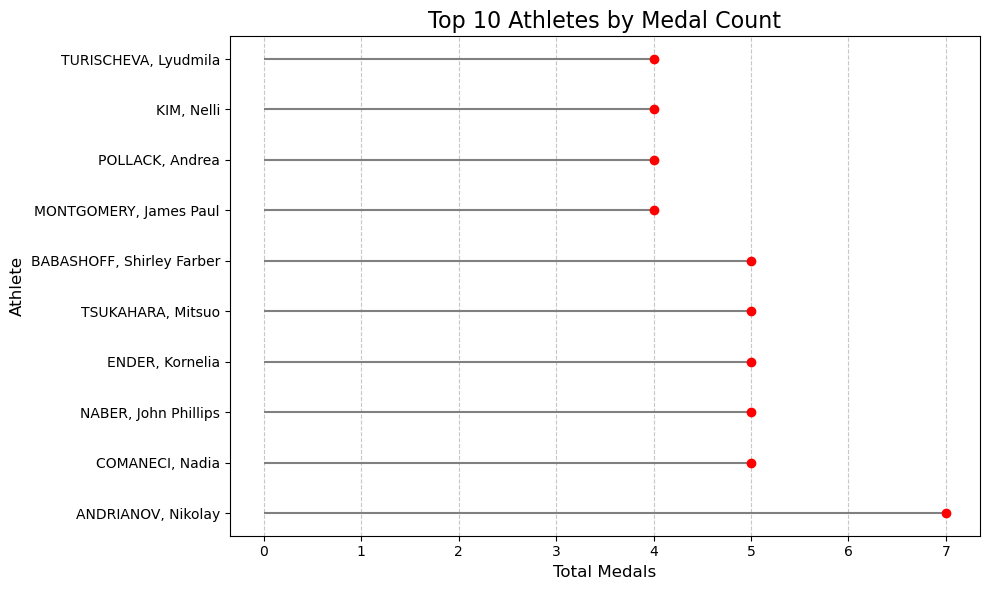

In [68]:
# Plotting the top 10 Athletes with most medals 

athletes = athlete_medal_count.head(10).index
medals = athlete_medal_count.head(10).values

plt.figure(figsize=(10,6))
plt.hlines(y=athletes, xmin=0, xmax=medals, color='gray')
plt.plot(medals, athletes, "o", color='red')
plt.title('Top 10 Athletes by Medal Count', fontsize=16)
plt.xlabel('Total Medals', fontsize=12)
plt.ylabel('Athlete', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Conclusion and Insights
● Top Performing Countries: We identified which countries won the most
medals.
● Top Athletes: We identified athletes who won the most medals.
● Gender Participation: The gender distribution in different sports events was
explored.
● Trend of Medals Over Years: We visualized the trend of medal wins over the
years.
The logistic regression model allowed us to predict whether an athlete would win a
medal based on various attributes like country, sport, andre features.